In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [32]:
df=pd.read_csv('CustomerChurn.csv')

In [33]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2272,8064-RAVOH,Male,0,No,Yes,1,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,49.85,49.85,No
6758,7956-XQWGU,Male,0,No,No,27,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.40,460.25,No
998,2545-LXYVJ,Male,0,Yes,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.70,1492.1,No
930,5146-CBVOE,Female,0,No,No,16,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),75.10,1212.85,No
4872,8125-QPFJD,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),84.90,6065.3,No


In [34]:
df.drop('customerID',axis='columns',inplace=True)

In [35]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [36]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [37]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [38]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [39]:
df1=df[df.TotalCharges!=' ']
df1.shape


(7032, 20)

In [40]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_30968\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [41]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

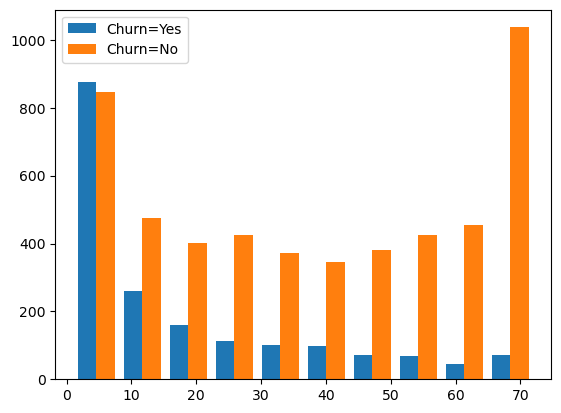

In [42]:
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()


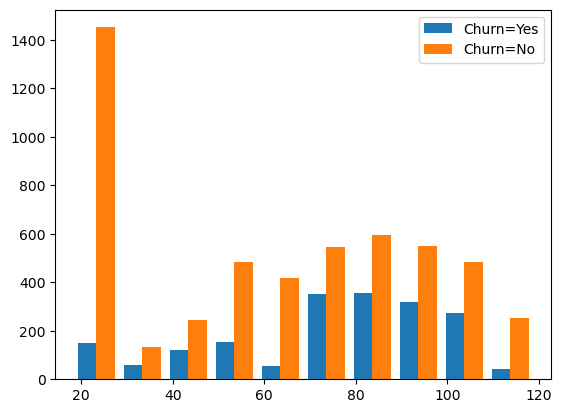

In [43]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_yes,mc_churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()

In [44]:
def unique_vals(df):

    for col in df:
        if df[col].dtypes=='object':
            print(f'{col}:{df[col].unique()}')

In [45]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_30968\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Rushabh\AppData\Local\Temp\ipykernel_30968\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [46]:
unique_vals(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [47]:
yes_no_col=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_30968\2802733113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [48]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')
    

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [49]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\Rushabh\AppData\Local\Temp\ipykernel_30968\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [50]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [51]:
pd.to_numeric(df2.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [52]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [53]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [54]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [55]:
x= df2.drop('Churn',axis='columns')
y=df2.Churn

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [57]:
X_train.shape

(5625, 26)

In [58]:
Y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [59]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=100)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
yp=model.predict(X_test)

In [ ]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:5]

In [ ]:
Y_test[:5]

In [60]:
model.evaluate(X_test,Y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
import seaborn as sn
cn=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)

sn.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
count_class_0,count_class_1=df2.Churn.value_counts()
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [63]:
df_class_0.shape

(5163, 27)

In [64]:
df_class_0_under=df_class_0.sample(count_class_1)
df_class_0_under

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3915,1,0,1,0,0.816901,1,0,1,0,1,...,False,True,False,False,True,False,False,True,False,False
838,0,0,0,0,0.492958,1,0,1,0,1,...,True,False,False,True,False,False,False,True,False,False
3886,1,1,1,0,1.000000,1,1,1,1,0,...,False,True,False,False,True,False,True,False,False,False
3519,0,1,0,0,0.591549,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3559,0,0,0,0,0.366197,1,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,0,0,1,1,0.760563,1,0,0,0,0,...,False,False,True,False,False,True,False,False,False,True
2515,1,0,0,0,0.887324,1,1,1,1,1,...,False,True,False,False,False,True,True,False,False,False
60,1,0,1,0,0.647887,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
2920,1,0,1,0,1.000000,1,0,1,1,1,...,True,False,False,False,False,True,False,False,False,True


In [65]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [66]:
df_test_under.Churn.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [67]:
Xs= df_test_under.drop('Churn',axis='columns')
Ys=df_test_under['Churn']



In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Ys,test_size=0.2,random_state=15, stratify=Ys)

In [69]:
Y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [70]:
model.fit(X_train,Y_train,epochs=100)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
yp=model.predict(X_test)
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred))

In [ ]:
Y_test[:10]

In [ ]:
y_pred[:10]

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
df_class_1.shape

In [ ]:
count_class_0

In [ ]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_class_1_over.shape

In [ ]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape

In [ ]:
xf=df_test_over.drop('Churn',axis='columns')
yf=df_test_over['Churn']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xf,yf,test_size=0.2,random_state=15,stratify=yf)

In [ ]:
y_train.value_counts()

In [ ]:
model.fit(x_train,y_train,epochs=100)

In [ ]:
y_pre=model.predict(x_test)
y_predict=[]
for element in y_pre:
    if element >0.5:
        y_predict.append(1)
    else :
        y_predict.append(0)

  

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predict))

In [ ]:
X=df2.drop('Churn',axis='columns')
Y=df2['Churn']


In [ ]:
pip install imblearn

In [ ]:
pip install imbalanced-learn --upgrade

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm,y_sm= smote.fit_resample(X,Y)

In [ ]:
y_sm.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
model.fit(X_train,Y_train,epochs=100)
pre= model.predict(X_test)

In [ ]:
y_predict=[]
for elements in pre:
    if elements>0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [ ]:
y_predict

In [ ]:
print(classification_report(Y_test,y_predict))

In [ ]:
df2.Churn.value_counts()

In [ ]:
x=df2.drop('Churn',axis='columns')
y=df2.Churn

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)

In [ ]:
Y_train.value_counts()

In [ ]:
df3=X_train.copy()
df3['Churn']=Y_train
df3.shape

In [ ]:
df3_class0=df3[df3.Churn==0]
df3_class1=df3[df3.Churn==1]

In [ ]:
df3_class1.shape

In [ ]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train=df_train.drop('Churn',axis='columns')
    Y_train=df_train.Churn
    
    return X_train,Y_train

In [ ]:
X_train,Y_train=get_train_batch(df3_class0,df3_class1,0,1495)

In [ ]:
model.fit(X_train,Y_train,epochs=100)

In [ ]:
px=model.predict(X_test)

In [ ]:
y_predict=[]
for elements in px:
    if elements>0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [ ]:
preds_1=print(classification_report(Y_test,y_predict))

In [ ]:
X_train,Y_train=get_train_batch(df3_class0,df3_class1,1495,2990)

In [ ]:
 def ANN(X_train,Y_train,X_test,Y_test) : 
    model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')

        ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train,Y_train,epochs=100) 
        
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print(classification_report(Y_test,y_preds))
    
    return y_preds

In [ ]:
preds_2=ANN(X_train,Y_train,X_test,Y_test)

In [ ]:
X_train,Y_train=get_train_batch(df3_class0,df3_class1,2990,4130)

In [ ]:
preds_3 =ANN(X_train,Y_train,X_test,Y_test)

In [ ]:
len(preds_2)


In [ ]:
y_pred_final=y_predict.copy()

for i in range(len(y_predict)):
    n_ones=y_predict[i]+preds_2[i]+preds_3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [ ]:
print(classification_report(Y_test,y_pred_final))